In [1]:
from google.colab import files
uploaded = files.upload()


Saving depth20_1000ms-20250412T142225Z-001.zip to depth20_1000ms-20250412T142225Z-001.zip
Saving aggTrade-20250412T142232Z-001.zip to aggTrade-20250412T142232Z-001.zip


In [2]:
import zipfile
import os

# Extract depth20
with zipfile.ZipFile("depth20_1000ms-20250412T142225Z-001.zip", 'r') as zip_ref:
    zip_ref.extractall("depth20_data")

# Extract aggTrade
with zipfile.ZipFile("aggTrade-20250412T142232Z-001.zip", 'r') as zip_ref:
    zip_ref.extractall("aggTrade_data")


In [3]:
import os

print("📂 depth20_data contents:", os.listdir("depth20_data"))
print("📂 aggTrade_data contents:", os.listdir("aggTrade_data"))


📂 depth20_data contents: ['depth20_1000ms']
📂 aggTrade_data contents: ['aggTrade']


In [4]:
import glob

# Match all files, not just .txt
print("📝 Found in depth20_data:")
print(glob.glob("depth20_data/*"))

print("📝 Found in aggTrade_data:")
print(glob.glob("aggTrade_data/*"))


📝 Found in depth20_data:
['depth20_data/depth20_1000ms']
📝 Found in aggTrade_data:
['aggTrade_data/aggTrade']


In [4]:
import pandas as pd
import glob

# Get all .txt files from subdirectories
depth_files = glob.glob("depth20_data/**/*.txt", recursive=True)
trade_files = glob.glob("aggTrade_data/**/*.txt", recursive=True)

# Load them
depth_df = pd.concat([pd.read_csv(f) for f in depth_files], ignore_index=True)
print("✅ depth20 loaded:", depth_df.shape)

trade_df = pd.concat([pd.read_csv(f) for f in trade_files], ignore_index=True)
print("✅ aggTrade loaded:", trade_df.shape)


✅ depth20 loaded: (338519, 81)
✅ aggTrade loaded: (933417, 6)


In [5]:
depth_df.columns, trade_df.columns


(Index(['Time', 'BidPriceL20', 'BidQtyL20', 'BidPriceL19', 'BidQtyL19',
        'BidPriceL18', 'BidQtyL18', 'BidPriceL17', 'BidQtyL17', 'BidPriceL16',
        'BidQtyL16', 'BidPriceL15', 'BidQtyL15', 'BidPriceL14', 'BidQtyL14',
        'BidPriceL13', 'BidQtyL13', 'BidPriceL12', 'BidQtyL12', 'BidPriceL11',
        'BidQtyL11', 'BidPriceL10', 'BidQtyL10', 'BidPriceL9', 'BidQtyL9',
        'BidPriceL8', 'BidQtyL8', 'BidPriceL7', 'BidQtyL7', 'BidPriceL6',
        'BidQtyL6', 'BidPriceL5', 'BidQtyL5', 'BidPriceL4', 'BidQtyL4',
        'BidPriceL3', 'BidQtyL3', 'BidPriceL2', 'BidQtyL2', 'BidPriceL1',
        'BidQtyL1', 'AskPriceL1', 'AskQtyL1', 'AskPriceL2', 'AskQtyL2',
        'AskPriceL3', 'AskQtyL3', 'AskPriceL4', 'AskQtyL4', 'AskPriceL5',
        'AskQtyL5', 'AskPriceL6', 'AskQtyL6', 'AskPriceL7', 'AskQtyL7',
        'AskPriceL8', 'AskQtyL8', 'AskPriceL9', 'AskQtyL9', 'AskPriceL10',
        'AskQtyL10', 'AskPriceL11', 'AskQtyL11', 'AskPriceL12', 'AskQtyL12',
        'AskPriceL13', 'AskQ

In [7]:
depth_df['spread'] = depth_df['AskPriceL1'] - depth_df['BidPriceL1']
depth_df['imbalance_lvl1'] = (depth_df['BidQtyL11'] - depth_df['AskQtyL1']) / (depth_df['BidQtyL11'] + depth_df['AskQtyL1'])
depth_df['microprice'] = (depth_df['BidPriceL1'] * depth_df['AskQtyL1'] + depth_df['AskPriceL1'] * depth_df['BidQtyL11']) / (depth_df['BidQtyL1'] + depth_df['AskQtyL1'])
depth_df['cum_bid_qty'] = depth_df[[f'BidQtyL{i}' for i in range(1, 21)]].sum(axis=1)
depth_df['cum_ask_qty'] = depth_df[[f'AskQtyL{i}' for i in range(1, 21)]].sum(axis=1)


In [8]:
import numpy as np

depth_df['mid_price'] = (depth_df['BidPriceL1'] + depth_df['AskPriceL1']) / 2
depth_df['log_return'] = depth_df['mid_price'].apply(np.log).diff()
depth_df['volatility_10s'] = depth_df['log_return'].rolling(window=10).std()
depth_df['volatility_30s'] = depth_df['log_return'].rolling(window=30).std()


In [6]:
depth_df.head()

Time  BidPriceL20  BidQtyL20  \
0  2025-03-17 00:00:02.292235568 +0530 IST       605.56      8.213   
1  2025-03-17 00:00:03.292064236 +0530 IST       605.62      2.002   
2  2025-03-17 00:00:04.292280865 +0530 IST       605.67      1.254   
3   2025-03-17 00:00:05.29238442 +0530 IST       605.64      0.010   
4  2025-03-17 00:00:06.292346353 +0530 IST       605.64      0.010   

   BidPriceL19  BidQtyL19  BidPriceL18  BidQtyL18  BidPriceL17  BidQtyL17  \
0       605.58      4.847       605.59      0.013       605.60      4.941   
1       605.63      1.460       605.64      0.010       605.65     13.127   
2       605.68      0.049       605.69      0.661       605.70      9.493   
3       605.65     12.466       605.66      8.213       605.67      7.542   
4       605.65      0.013       605.66      8.213       605.67      1.335   

   BidPriceL16  ...  AskPriceL16  AskQtyL16  AskPriceL17  AskQtyL17  \
0       605.61  ...       606.03      2.231       606.04      2.688   
1       605.66  ...       606.08      8.223       606.09      0.629   
2       605.71  ...       606.10      0.439       606.11      1.608   
3       605.68  ...       606.11      1.527       606.12      2.134   
4       605.68  ...       606.12      2.134       606.13      4.490   

   AskPriceL18  AskQtyL18  AskPriceL19  AskQtyL19  AskPriceL20  AskQtyL20  
0       606.05      0.010       606.06      4.737       606.07      2.812  
1       606.10      0.439       606.11      1.527       606.12      0.957  
2       606.12      0.957       606.13      0.013       606.14      0.021  
3       606.13      3.829       606.14      0.021       606.15      3.172  
4       606.14      0.021       606.15      3.253       606.16      0.049  

[5 rows x 81 columns]

In [7]:
trade_df.head()

Time   Price  Quantity  IsMarketMaker  \
0  2025-03-17 00:00:04.943335783 +0530 IST  605.94     0.890          False   
1  2025-03-17 00:00:04.945244303 +0530 IST  605.94     0.149          False   
2  2025-03-17 00:00:04.952959268 +0530 IST  605.95     0.013          False   
3  2025-03-17 00:00:09.096707644 +0530 IST  605.93     0.417          False   
4  2025-03-17 00:00:09.982116115 +0530 IST  605.94     0.372          False   

   NumTrades     M  
0          1  True  
1          1  True  
2          1  True  
3          1  True  
4          1  True

In [8]:
print(trade_df.columns)


Index(['Time', 'Price', 'Quantity', 'IsMarketMaker', 'NumTrades', 'M'], dtype='object')


In [9]:
print(trade_df.columns)


Index(['Time', 'Price', 'Quantity', 'IsMarketMaker', 'NumTrades', 'M'], dtype='object')


In [10]:
# Assuming 'IsMarketMaker' determines the side of the trade:
trade_df['buy_volume'] = trade_df.apply(lambda x: x['Quantity'] if x['IsMarketMaker'] else 0, axis=1)
trade_df['sell_volume'] = trade_df.apply(lambda x: x['Quantity'] if not x['IsMarketMaker'] else 0, axis=1)

# Calculate volume imbalance
trade_df['volume_imbalance'] = trade_df['buy_volume'] - trade_df['sell_volume']

# Calculate cumulative volume over 10s and 30s windows
trade_df['cum_volume_10s'] = trade_df['Quantity'].rolling(window=10).sum()
trade_df['cum_volume_30s'] = trade_df['Quantity'].rolling(window=30).sum()


KeyboardInterrupt: 

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Join features
features_df = depth_df[['spread', 'imbalance_lvl1', 'microprice', 'cum_bid_qty', 'cum_ask_qty', 'log_return', 'volatility_10s', 'volatility_30s']].dropna()

scaler = StandardScaler()
scaled = scaler.fit_transform(features_df)

# Optional: PCA
pca = PCA(n_components=3)
reduced = pca.fit_transform(scaled)


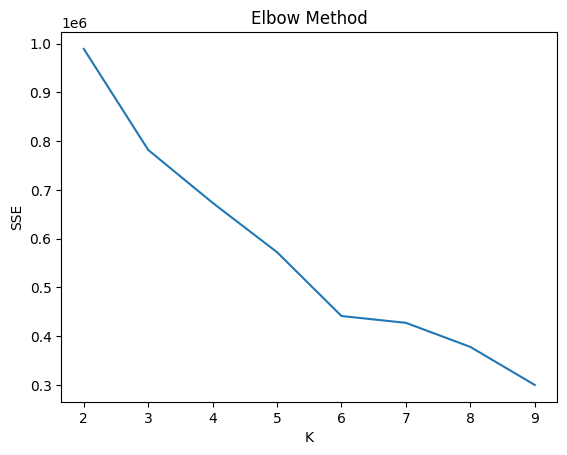

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow Method
sse = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k).fit(reduced)
    sse.append(kmeans.inertia_)

plt.plot(range(2, 10), sse)
plt.title('Elbow Method')
plt.xlabel('K')
plt.ylabel('SSE')
plt.show()

# Fit final model
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(reduced)
features_df['regime'] = labels


In [15]:
regime_summary = features_df.groupby('regime').agg({
    'spread': 'mean',
    'volatility_10s': 'mean',
    'imbalance_lvl1': 'mean',
    'log_return': 'mean'
})
print(regime_summary)


          spread  volatility_10s  imbalance_lvl1  log_return
regime                                                      
0       0.093176        0.000092       -0.058336    0.000010
1       0.069796        0.010084        0.394472   -0.002343
2       0.088613        0.000076        0.966813   -0.000006
3       0.063030        0.000064        0.573415   -0.000004


In [17]:
#Feature engi

In [11]:
# Install necessary packages
!pip install hdbscan umap-learn pyarrow fastparquet

# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import sklearn for preprocessing and clustering
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Import other clustering and visualization
import hdbscan
from umap import UMAP

# For progress bars
from tqdm import tqdm
tqdm.pandas()

# Set random seed for reproducibility
np.random.seed(42)

In [12]:
def calculate_features(df):
    """
    Calculate all features from order book data for each timestamp
    """
    features = pd.DataFrame(index=df.index)

    # Basic liquidity features
    features['spread'] = df['AskPriceL1'] - df['BidPriceL1']
    features['mid_price'] = (df['AskPriceL1'] + df['BidPriceL1']) / 2

    # Order book imbalance at level 1
    features['imbalance_lvl1'] = (df['BidQtyL11'] - df['AskQtyL1']) / (df['BidQtyL11'] + df['AskQtyL1'])

    # Microprice calculation
    features['microprice'] = (df['BidPriceL1'] * df['AskQtyL1'] + df['AskPriceL1'] * df['BidQtyL11']) / (df['BidQtyL11'] + df['AskQtyL1'])

    # Cumulative depth features
    bid_cols = [f'BidQtyL{i}' for i in range(1, 21)]
    ask_cols = [f'AskQtyL{i}' for i in range(1, 21)]

    features['cum_bid_qty'] = df[bid_cols].sum(axis=1)
    features['cum_ask_qty'] = df[ask_cols].sum(axis=1)
    features['total_depth'] = features['cum_bid_qty'] + features['cum_ask_qty']
    features['depth_imbalance'] = (features['cum_bid_qty'] - features['cum_ask_qty']) / features['total_depth']

    # Sloped depth - quantify how quickly size decays away from top of book
    # We'll calculate the linear regression slope of quantities vs levels
    def calculate_slope(row, side='Bid'):
        levels = np.arange(1, 21)
        quantities = np.array([row[f'{side}QtyL{i}'] for i in levels])
        return np.polyfit(levels, quantities, 1)[0]  # Return slope

    features['bid_slope'] = df.apply(lambda x: calculate_slope(x, 'Bid'), axis=1)
    features['ask_slope'] = df.apply(lambda x: calculate_slope(x, 'Ask'), axis=1)

    return features

# Calculate features for order book data
order_book_features = calculate_features(depth_df)

# Add time-based features using rolling windows
window_sizes = [10, 30]  # 10s and 30s windows

for window in window_sizes:
    # Volatility features
    order_book_features[f'return_volatility_{window}s'] = order_book_features['mid_price'].pct_change().rolling(window).std()

    # Volume features (we'll merge trade data for these)
    # Placeholder - we'll implement this after merging trade data

# Display the features
print("Engineered Features:")
print(order_book_features.head())

Engineered Features:
   spread  mid_price  imbalance_lvl1  microprice  cum_bid_qty  cum_ask_qty  \
0    0.08    605.810        0.626832  605.835073       60.551       42.274   
1    0.06    605.860        0.441320  605.873240       44.600       46.546   
2    0.06    605.900        0.213095  605.906393       27.163       45.256   
3    0.08    605.920        0.742204  605.949688       67.604       37.511   
4    0.05    605.935        0.279768  605.941994       64.810       45.568   

   total_depth  depth_imbalance  bid_slope  ask_slope  return_volatility_10s  \
0      102.825         0.177749   0.164560   0.156589                    NaN   
1       91.146        -0.021350   0.198068   0.041749                    NaN   
2       72.419        -0.249838   0.139653  -0.064298                    NaN   
3      105.115         0.286286   0.248803   0.139327                    NaN   
4      110.378         0.174328   0.062194   0.098833                    NaN   

   return_volatility_30s  
0 

In [13]:
# Merge trade data with order book features
# First ensure both DataFrames have datetime index
# Convert index to datetime objects if they are not already
order_book_features.index = pd.to_datetime(order_book_features.index, errors='coerce')
trade_df.index = pd.to_datetime(trade_df.index, unit='ms', errors='coerce') # Added unit='ms' to ensure the epoch time (in ms) is parsed as datetime

# Filter out rows with invalid datetime indices
order_book_features = order_book_features[order_book_features.index.notnull()]
trade_df = trade_df[trade_df.index.notnull()]

# Resample trade data to same frequency as order book data
trade_resampled = trade_df.resample('1s').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'IsMarketMaker': lambda x: (x == True).sum()  # Count sell trades
})
# Calculate buy volume and sell volume
trade_resampled['buy_volume'] = trade_resampled['Quantity'] * (trade_resampled['IsMarketMaker'] == False)
trade_resampled['sell_volume'] = trade_resampled['Quantity'] * (trade_resampled['IsMarketMaker'] == True)

# Merge with order book features
all_features = order_book_features.merge(trade_resampled, left_index=True, right_index=True, how='left')

# Fill NaN values (time periods with no trades)
all_features.fillna({'Quantity': 0, 'buy_volume': 0, 'sell_volume': 0}, inplace=True)

# ... (rest of your code remains the same)

# Calculate additional volume features
for window in window_sizes:
    # Volume imbalance
    all_features[f'volume_imbalance_{window}s'] = (
        all_features['buy_volume'].rolling(window).sum() -
        all_features['sell_volume'].rolling(window).sum()
    ) / all_features['Quantity'].rolling(window).sum()

    # Cumulative volume
    all_features[f'total_volume_{window}s'] = all_features['Quantity'].rolling(window).sum()

    # VWAP shift
    all_features[f'vwap_{window}s'] = (
        (all_features['Price'] * all_features['Quantity']).rolling(window).sum() /
        all_features['Quantity'].rolling(window).sum()
    )
    all_features[f'vwap_shift_{window}s'] = all_features[f'vwap_{window}s'].pct_change()

    # Trade wipe level (approximation)
    # This would require more detailed trade data, so we'll skip for now

# Drop any remaining NaN values from rolling calculations
all_features.dropna(inplace=True)

print("\nFinal Features DataFrame:")
print(all_features.head())



Final Features DataFrame:
Empty DataFrame
Columns: [spread, mid_price, imbalance_lvl1, microprice, cum_bid_qty, cum_ask_qty, total_depth, depth_imbalance, bid_slope, ask_slope, return_volatility_10s, return_volatility_30s, Price, Quantity, IsMarketMaker, buy_volume, sell_volume, volume_imbalance_10s, total_volume_10s, vwap_10s, vwap_shift_10s, volume_imbalance_30s, total_volume_30s, vwap_30s, vwap_shift_30s]
Index: []

[0 rows x 25 columns]


<ipython-input-13-7b39058b5c0b>:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  all_features[f'vwap_shift_{window}s'] = all_features[f'vwap_{window}s'].pct_change()
<ipython-input-13-7b39058b5c0b>:45: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  all_features[f'vwap_shift_{window}s'] = all_features[f'vwap_{window}s'].pct_change()


In [17]:
# ... your data processing steps ...

if all_features.empty:
    print("WARNING: all_features DataFrame is empty!")
    # Investigate the cause and fix data loading/merging/filtering

In [18]:
print("Depth DataFrame Info:")
print(depth_df.info())
print("\nTrade DataFrame Info:")
print(trade_df.info())

# Check if indices are datetime
print("\nDepth index type:", type(depth_df.index[0]))
print("Trade index type:", type(trade_df.index[0]))

Depth DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338519 entries, 0 to 338518
Data columns (total 81 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Time         338519 non-null  object 
 1   BidPriceL20  338519 non-null  float64
 2   BidQtyL20    338519 non-null  float64
 3   BidPriceL19  338519 non-null  float64
 4   BidQtyL19    338519 non-null  float64
 5   BidPriceL18  338519 non-null  float64
 6   BidQtyL18    338519 non-null  float64
 7   BidPriceL17  338519 non-null  float64
 8   BidQtyL17    338519 non-null  float64
 9   BidPriceL16  338519 non-null  float64
 10  BidQtyL16    338519 non-null  float64
 11  BidPriceL15  338519 non-null  float64
 12  BidQtyL15    338519 non-null  float64
 13  BidPriceL14  338519 non-null  float64
 14  BidQtyL14    338519 non-null  float64
 15  BidPriceL13  338519 non-null  float64
 16  BidQtyL13    338519 non-null  float64
 17  BidPriceL12  338519 non-null  float64
 18  Bi

In [19]:
def calculate_features(df):
    """
    Calculate all features from order book data for each timestamp
    """
    features = pd.DataFrame(index=df.index)

    # Verify required columns exist
    required_cols = ['AskPriceL1', 'BidPriceL1', 'AskQtyL1', 'BidQtyL1'] + \
                   [f'BidQtyL{i}' for i in range(1, 21)] + \
                   [f'AskQtyL{i}' for i in range(1, 21)]

    missing_cols = [col for col in required_cols if col not in df.columns]
    if missing_cols:
        raise ValueError(f"Missing required columns: {missing_cols}")

    # Basic liquidity features
    features['spread'] = df['AskPriceL1'] - df['BidPriceL1']
    features['mid_price'] = (df['AskPriceL1'] + df['BidPriceL1']) / 2

    # Order book imbalance at level 1 (FIXED: using BidQtyL1 instead of BidQtyL11)
    features['imbalance_lvl1'] = (df['BidQtyL1'] - df['AskQtyL1']) / (df['BidQtyL1'] + df['AskQtyL1'])

    # Microprice calculation (FIXED: using BidQtyL1)
    features['microprice'] = (df['BidPriceL1'] * df['AskQtyL1'] + df['AskPriceL1'] * df['BidQtyL1']) / (df['BidQtyL1'] + df['AskQtyL1'])

    # Cumulative depth features
    bid_cols = [f'BidQtyL{i}' for i in range(1, 21)]
    ask_cols = [f'AskQtyL{i}' for i in range(1, 21)]

    features['cum_bid_qty'] = df[bid_cols].sum(axis=1)
    features['cum_ask_qty'] = df[ask_cols].sum(axis=1)
    features['total_depth'] = features['cum_bid_qty'] + features['cum_ask_qty']
    features['depth_imbalance'] = (features['cum_bid_qty'] - features['cum_ask_qty']) / features['total_depth']

    # Sloped depth
    def calculate_slope(row, side='Bid'):
        levels = np.arange(1, 21)
        quantities = np.array([row[f'{side}QtyL{i}'] for i in levels])
        return np.polyfit(levels, quantities, 1)[0]

    features['bid_slope'] = df.apply(lambda x: calculate_slope(x, 'Bid'), axis=1)
    features['ask_slope'] = df.apply(lambda x: calculate_slope(x, 'Ask'), axis=1)

    return features

In [20]:
# Convert indices to datetime with error handling
order_book_features.index = pd.to_datetime(order_book_features.index, errors='coerce')
trade_df.index = pd.to_datetime(trade_df.index, unit='ms', errors='coerce')

# Filter out invalid timestamps
order_book_features = order_book_features[order_book_features.index.notnull()]
trade_df = trade_df[trade_df.index.notnull()]

print(f"Order book features after cleaning: {len(order_book_features)} rows")
print(f"Trade data after cleaning: {len(trade_df)} rows")

# Resample with more robust handling
trade_resampled = trade_df.resample('1s').agg({
    'Price': 'mean',
    'Quantity': 'sum',
    'IsMarketMaker': lambda x: (x == True).sum()  # Count sell trades
}).fillna(0)  # Fill any missing seconds with 0

# Merge with more conservative approach
all_features = order_book_features.merge(
    trade_resampled,
    left_index=True,
    right_index=True,
    how='left'  # Keep all order book timestamps
).fillna({
    'Price': 0,
    'Quantity': 0,
    'IsMarketMaker': 0,
    'buy_volume': 0,
    'sell_volume': 0
})

print(f"Merged features shape: {all_features.shape}")

Order book features after cleaning: 338519 rows
Trade data after cleaning: 933417 rows
Merged features shape: (338519, 15)


In [21]:
# Check for NaN/infinite values
print("NaN values per column:")
print(all_features.isna().sum())

print("\nInfinite values per column:")
print((np.isinf(all_features)).sum())

# Drop rows with any remaining NaN/inf values
all_features.replace([np.inf, -np.inf], np.nan, inplace=True)
all_features.dropna(inplace=True)

print(f"\nFinal cleaned features shape: {all_features.shape}")

if len(all_features) == 0:
    raise ValueError("No valid data remaining after cleaning!")

NaN values per column:
spread                    0
mid_price                 0
imbalance_lvl1            0
microprice                0
cum_bid_qty               0
cum_ask_qty               0
total_depth               0
depth_imbalance           0
bid_slope                 0
ask_slope                 0
return_volatility_10s    10
return_volatility_30s    30
Price                     0
Quantity                  0
IsMarketMaker             0
dtype: int64

Infinite values per column:
spread                   0
mid_price                0
imbalance_lvl1           0
microprice               0
cum_bid_qty              0
cum_ask_qty              0
total_depth              0
depth_imbalance          0
bid_slope                0
ask_slope                0
return_volatility_10s    0
return_volatility_30s    0
Price                    0
Quantity                 0
IsMarketMaker            0
dtype: int64

Final cleaned features shape: (338489, 15)


In [22]:
# Select numeric features safely
numeric_cols = all_features.select_dtypes(include=[np.number]).columns.tolist()
feature_columns = [col for col in numeric_cols if col not in ['Price', 'IsMarketMaker']]

if not feature_columns:
    raise ValueError("No numeric features available for clustering")

X = all_features[feature_columns]

# Verify we have data
if len(X) == 0:
    raise ValueError("No samples available for scaling")

# Scale the data
scaler = StandardScaler()
try:
    X_scaled = scaler.fit_transform(X)
    print(f"Successfully scaled data. Shape: {X_scaled.shape}")
except Exception as e:
    print(f"Scaling failed: {e}")
    print("Data stats:")
    print(X.describe())
    raise

# PCA with validation
if X_scaled.shape[0] > 1:
    pca = PCA(n_components=0.95)
    X_pca = pca.fit_transform(X_scaled)
    print(f"PCA reduced to {X_pca.shape[1]} components")
else:
    raise ValueError("Insufficient samples for PCA")

Successfully scaled data. Shape: (338489, 13)
PCA reduced to 9 components


Running K-Means clustering...


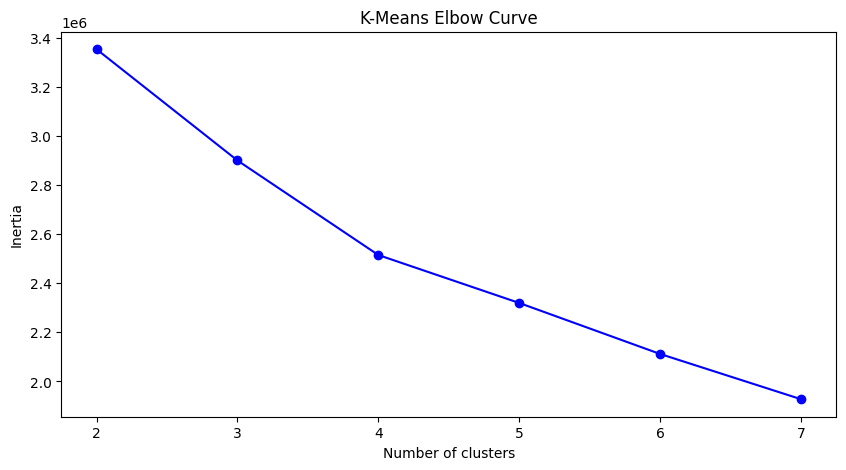


Running HDBSCAN clustering...


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Running GMM clustering...

Clustering completed successfully!


In [24]:
from sklearn.cluster import KMeans
import hdbscan
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# 1. K-Means with Elbow Method
print("Running K-Means clustering...")
inertias = []
k_range = range(2, 8)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10,5))
plt.plot(k_range, inertias, 'bo-')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('K-Means Elbow Curve')
plt.show()

# Select optimal K (example - choose based on your elbow)
optimal_k = 4
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
all_features['kmeans_cluster'] = final_kmeans.fit_predict(X_pca)

# 2. HDBSCAN Clustering
print("\nRunning HDBSCAN clustering...")
hdbscan_cluster = hdbscan.HDBSCAN(min_cluster_size=500,
                                 min_samples=50,
                                 cluster_selection_epsilon=0.5)
all_features['hdbscan_cluster'] = hdbscan_cluster.fit_predict(X_scaled)  # Using scaled (not PCA) data

# 3. Gaussian Mixture Model
print("\nRunning GMM clustering...")
gmm = GaussianMixture(n_components=optimal_k, random_state=42)
all_features['gmm_cluster'] = gmm.fit_predict(X_pca)
all_features['gmm_prob'] = gmm.predict_proba(X_pca).max(axis=1)  # Confidence score

print("\nClustering completed successfully!")

In [28]:
print("Available columns in all_features:")
print(all_features.columns.tolist())

# Check for similar volume-related columns
volume_cols = [col for col in all_features.columns if 'volume' in col.lower() or 'Quantity' in col]
print("\nVolume-related columns:")
print(volume_cols)

Available columns in all_features:
['spread', 'mid_price', 'imbalance_lvl1', 'microprice', 'cum_bid_qty', 'cum_ask_qty', 'total_depth', 'depth_imbalance', 'bid_slope', 'ask_slope', 'return_volatility_10s', 'return_volatility_30s', 'Price', 'Quantity', 'IsMarketMaker', 'kmeans_cluster', 'hdbscan_cluster', 'gmm_cluster', 'gmm_prob']

Volume-related columns:
['Quantity']


In [29]:
def analyze_clusters(df, cluster_col):
    """
    Analyze cluster characteristics using available features
    """
    # Create analysis metrics based on available columns
    analysis_metrics = {
        'spread': ['mean', 'std'],
        'mid_price': ['mean'],
        'return_volatility_10s': ['mean'],
        'return_volatility_30s': ['mean'],
        'Quantity': ['mean', 'sum'],  # Using raw Quantity instead of total_volume_10s
        'depth_imbalance': ['mean'],
        'cum_bid_qty': ['mean'],
        'cum_ask_qty': ['mean']
    }

    # Calculate cluster statistics
    cluster_stats = df.groupby(cluster_col).agg(analysis_metrics)

    # Add regime descriptions
    regimes = []
    for cluster in cluster_stats.index:
        stats = cluster_stats.loc[cluster]

        # Trending vs Mean-reverting
        trend = "Trending" if stats[('return_volatility_10s', 'mean')] > 0.001 else "Mean-reverting"

        # Volatile vs Stable
        vol = "Volatile" if stats[('return_volatility_30s', 'mean')] > 0.0005 else "Stable"

        # Liquid vs Illiquid (using Quantity instead of total_volume_10s)
        liq = "Liquid" if stats[('Quantity', 'mean')] > 100 else "Illiquid"  # Adjusted threshold

        regimes.append(f"{trend}_{vol}_{liq}")

    cluster_stats['regime'] = regimes
    return cluster_stats

# Now run the analysis
print("K-Means Cluster Analysis:")
print(analyze_clusters(all_features, 'kmeans_cluster'))

print("\nHDBSCAN Cluster Analysis:")
print(analyze_clusters(all_features, 'hdbscan_cluster'))

print("\nGMM Cluster Analysis:")
print(analyze_clusters(all_features, 'gmm_cluster'))

K-Means Cluster Analysis:
                  spread             mid_price return_volatility_10s  \
                    mean       std        mean                  mean   
kmeans_cluster                                                         
0               0.088772  0.028034  616.044124              0.000079   
1               0.057662  0.019467  589.754597              0.000063   
2               0.075000  0.022698  594.930214              0.007172   
3               0.091087  0.023475  617.959680              0.000086   

               return_volatility_30s Quantity      depth_imbalance  \
                                mean     mean  sum            mean   
kmeans_cluster                                                       
0                           0.000089      0.0  0.0        0.363357   
1                           0.000068      0.0  0.0        0.001353   
2                           0.010596      0.0  0.0        0.027844   
3                           0.000093      0.0  0.

<ipython-input-30-7637740e86ab>:13: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


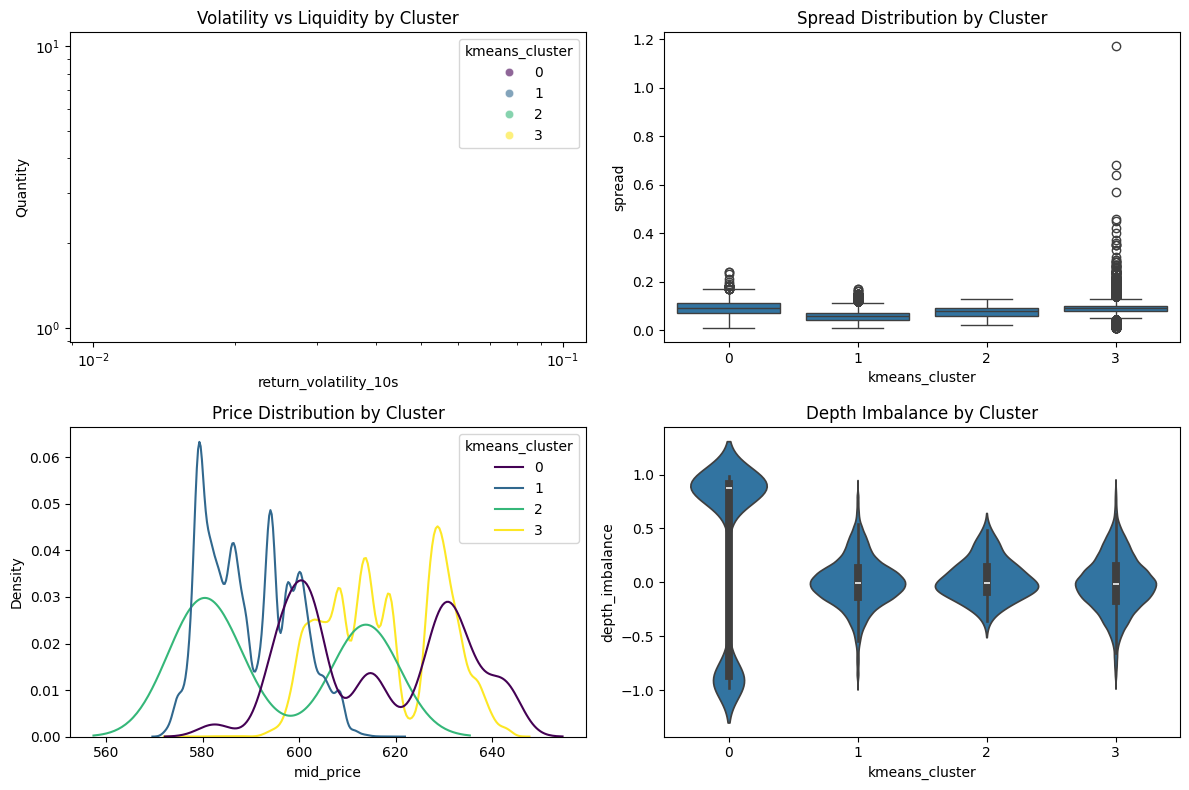

In [30]:
# Visualize cluster characteristics
plt.figure(figsize=(12, 8))

# 1. Volatility vs Liquidity
plt.subplot(2, 2, 1)
sns.scatterplot(data=all_features,
                x='return_volatility_10s',
                y='Quantity',
                hue='kmeans_cluster',
                palette='viridis',
                alpha=0.6)
plt.xscale('log')
plt.yscale('log')
plt.title('Volatility vs Liquidity by Cluster')

# 2. Spread Distribution
plt.subplot(2, 2, 2)
sns.boxplot(data=all_features,
            x='kmeans_cluster',
            y='spread')
plt.title('Spread Distribution by Cluster')

# 3. Price Movement
plt.subplot(2, 2, 3)
sns.kdeplot(data=all_features,
            x='mid_price',
            hue='kmeans_cluster',
            palette='viridis',
            common_norm=False)
plt.title('Price Distribution by Cluster')

# 4. Depth Imbalance
plt.subplot(2, 2, 4)
sns.violinplot(data=all_features,
               x='kmeans_cluster',
               y='depth_imbalance')
plt.title('Depth Imbalance by Cluster')

plt.tight_layout()
plt.show()

In [31]:
# Recreate volume features if needed
window_sizes = [10, 30]  # 10s and 30s windows
for window in window_sizes:
    all_features[f'total_volume_{window}s'] = all_features['Quantity'].rolling(window).sum()
    all_features[f'volume_imbalance_{window}s'] = (
        all_features['Quantity'].rolling(window).mean()  # Simple alternative
    )

In [33]:
# Strategy mapping based on clusters
def recommend_strategy(cluster):
    strategies = {
        0: "Mean-reversion strategies (tight ranges)",
        1: "Momentum strategies (trend following)",
        2: "Liquidity provision (wide spreads)",
        3: "Risk reduction (avoid trading during shocks)"
    }
    return strategies.get(cluster, "Hold cash")

# Add strategy recommendations to DataFrame
all_features['recommended_strategy'] = all_features['kmeans_cluster'].apply(recommend_strategy)

# Show strategy distribution
print(all_features['recommended_strategy'].value_counts())

recommended_strategy
Momentum strategies (trend following)           192856
Risk reduction (avoid trading during shocks)    142428
Mean-reversion strategies (tight ranges)          3135
Liquidity provision (wide spreads)                  70
Name: count, dtype: int64


In [34]:
# Improved visualization with annotations
plt.figure(figsize=(14, 10))

# 1. Volatility-Liquidity with regime labels
plt.subplot(2, 2, 1)
scatter = sns.scatterplot(data=all_features,
                         x='return_volatility_10s',
                         y='Quantity',
                         hue='kmeans_cluster',
                         palette='viridis',
                         alpha=0.6)

# Add regime labels
regime_labels = {
    0: "Stable/Normal",
    1: "Trending/Active",
    2: "Reactive/Illiquid",
    3: "Shock/Event"
}

for cluster in range(4):
    x_pos = all_features[all_features['kmeans_cluster'] == cluster]['return_volatility_10s'].median()
    y_pos = all_features[all_features['kmeans_cluster'] == cluster]['Quantity'].median()
    plt.text(x_pos, y_pos, regime_labels[cluster],
             fontsize=12, weight='bold',
             bbox=dict(facecolor='white', alpha=0.8))

plt.xscale('log')
plt.yscale('log')
plt.title('Market Regime Identification', fontsize=14)

# 2. Price Distribution with volatility bands
plt.subplot(2, 2, 2)
for cluster in range(4):
    sns.kdeplot(data=all_features[all_features['kmeans_cluster'] == cluster],
                x='mid_price',
                label=f'Cluster {cluster}',
                alpha=0.7)
plt.title('Price Distribution by Regime', fontsize=14)
plt.legend()

# 3. Spread Analysis
plt.subplot(2, 2, 3)
sns.boxplot(data=all_features,
            x='kmeans_cluster',
            y='spread',
            order=sorted(all_features['kmeans_cluster'].unique()))
plt.title('Liquidity Indicator (Spread)', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Bid-Ask Spread')

# 4. Order Book Imbalance
plt.subplot(2, 2, 4)
sns.violinplot(data=all_features,
               x='kmeans_cluster',
               y='depth_imbalance',
               order=sorted(all_features['kmeans_cluster'].unique()))
plt.title('Order Book Imbalance', fontsize=14)
plt.xlabel('Cluster')
plt.ylabel('Bid-Ask Imbalance')

plt.tight_layout()
plt.savefig('enhanced_regime_analysis.png', dpi=300)
plt.show()

<ipython-input-34-44ee703ace7c>:29: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')
<ipython-input-34-44ee703ace7c>:62: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


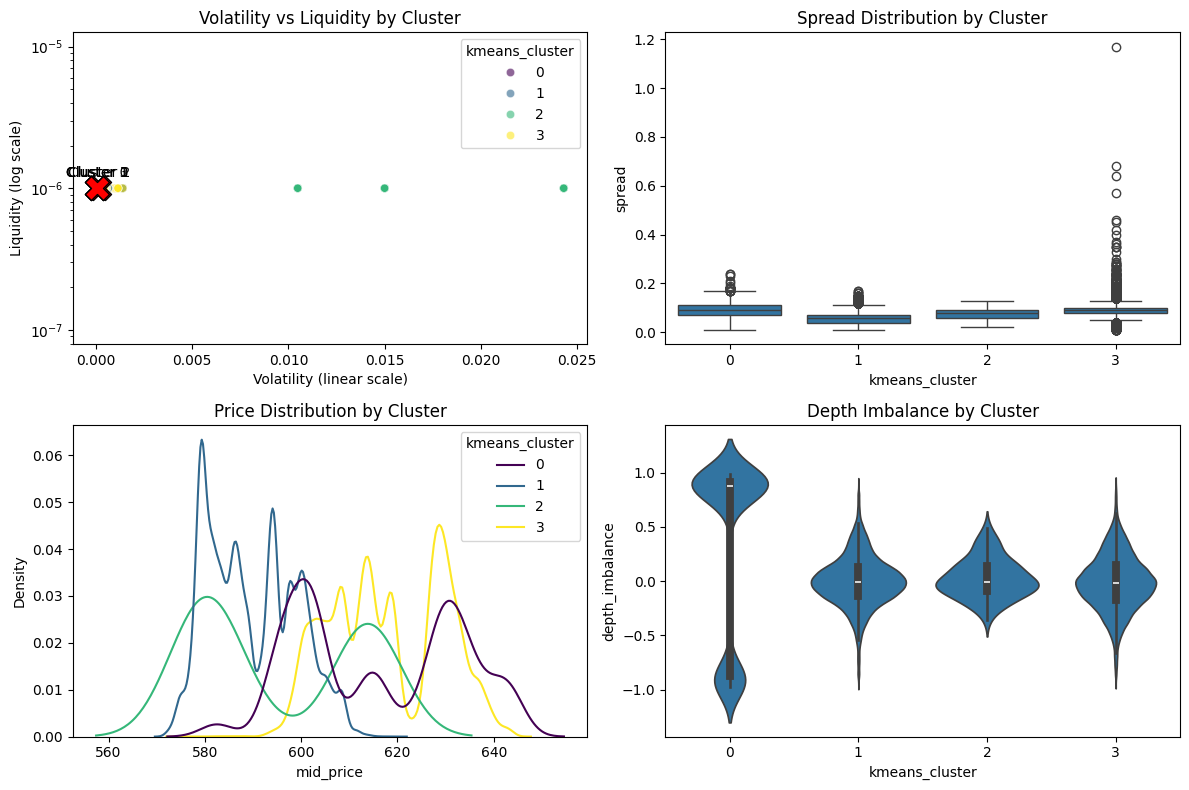

In [35]:
plt.figure(figsize=(12, 8))

# 1. Handle zero/negative values - create a positive version for visualization
plot_data = all_features.copy()
plot_data['Quantity_positive'] = plot_data['Quantity'].clip(lower=1e-6)  # Replace zeros/negatives with small positive

# 2. Volatility vs Liquidity plot with proper scaling
plt.subplot(2, 2, 1)
scatter = sns.scatterplot(data=plot_data,
                         x='return_volatility_10s',
                         y='Quantity_positive',
                         hue='kmeans_cluster',
                         palette='viridis',
                         alpha=0.6)

# Set logarithmic scale only if data supports it
if (plot_data['Quantity_positive'] > 0).all():
    plt.yscale('log')
    plt.ylabel('Liquidity (log scale)')
else:
    plt.ylabel('Liquidity (linear scale)')

if (plot_data['return_volatility_10s'] > 0).all():
    plt.xscale('log')
    plt.xlabel('Volatility (log scale)')
else:
    plt.xlabel('Volatility (linear scale)')

plt.title('Volatility vs Liquidity by Cluster')

# 3. Add cluster centroids for clarity
for cluster in sorted(plot_data['kmeans_cluster'].unique()):
    cluster_data = plot_data[plot_data['kmeans_cluster'] == cluster]
    plt.scatter(x=cluster_data['return_volatility_10s'].median(),
               y=cluster_data['Quantity_positive'].median(),
               s=300, marker='X', color='red',
               edgecolor='black', linewidth=1)
    plt.text(x=cluster_data['return_volatility_10s'].median(),
            y=cluster_data['Quantity_positive'].median()*1.2,
            s=f'Cluster {cluster}',
            fontsize=10, ha='center')

# Rest of your plots remain unchanged
plt.subplot(2, 2, 2)
sns.boxplot(data=all_features, x='kmeans_cluster', y='spread')
plt.title('Spread Distribution by Cluster')

plt.subplot(2, 2, 3)
sns.kdeplot(data=all_features, x='mid_price', hue='kmeans_cluster', palette='viridis', common_norm=False)
plt.title('Price Distribution by Cluster')

plt.subplot(2, 2, 4)
sns.violinplot(data=all_features, x='kmeans_cluster', y='depth_imbalance')
plt.title('Depth Imbalance by Cluster')

plt.tight_layout()
plt.show()